# Analysis:
1. Initial outlier analysis
2. Data distribution
3. Find Insight: demand by temperature, demand by precipitation, demand by hour, weekday vs weekend, school holiday vs non school holiday, precipitation during weekday vs precipitation during weekend
3. Feature Engineering: Check for correlation between features
4. Feature selection using AIC
5. Other interesting findings

In [11]:
from pyspark.sql.functions import to_timestamp, date_format, hour, dayofweek
from pyspark.sql.functions import isnan, when, count, col, split, concat, lit
from pyspark.sql.functions import to_date, create_map
from itertools import chain
from pyspark.sql import SparkSession, Window, functions as F
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# Create a spark session (which will run spark jobs)
spark = (
    SparkSession.builder.appName("Analysis")
    .config("spark.sql.repl.eagerEval.enabled", True) 
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .getOrCreate()
)

In [13]:
sdf = spark.read.parquet("../data/curated/curated_sdf.parquet")

In [14]:
df = pd.read_parquet("../data/curated/sample_data.parquet")

---
# Initial Outlier Analysis

In [15]:
df['pu_location_id'].value_counts()

132    264083
138    249555
1         823
Name: pu_location_id, dtype: int64

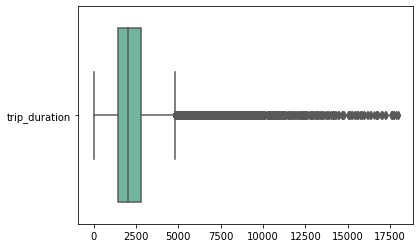

In [9]:
ax = sns.boxplot(data=df[['trip_duration']], orient="h", palette="Set2")

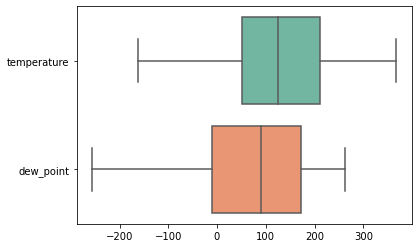

In [8]:
ax = sns.boxplot(data=df[['temperature', 'dew_point']], orient="h", palette="Set2")

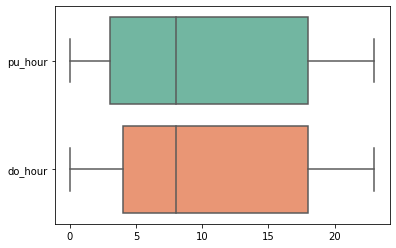

In [11]:
ax = sns.boxplot(data=df[['pu_hour', 'do_hour']], orient="h", palette="Set2")

<AxesSubplot:xlabel='do_hour'>

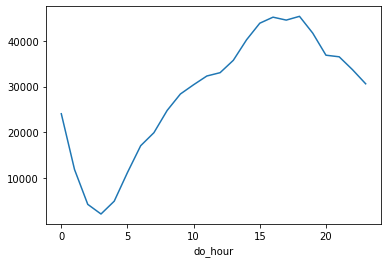

In [6]:
df.groupby(df['do_hour']).size().plot()
